Index(['Year', 'Production \n', 'Temperature', 'Humidity', 'Rainfall',
       'Wind speed'],
      dtype='object')
Test R-squared: 0.253140875461351
Training R-squared: 0.7971841407987541


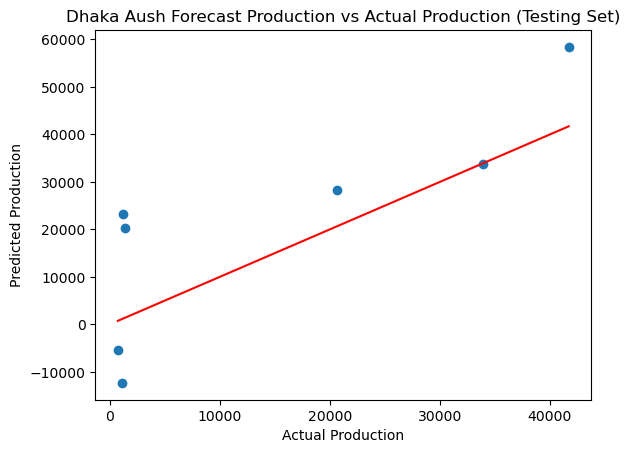

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load your dataset
df = pd.read_csv('Aush_Dhakaf.csv')
print(df.columns)

# Define train and test sets
train_x = df.drop('Production \n', axis=1)
train_y = df['Production \n']

# Split the data into train and test sets
train_X, test_X, train_Y, test_Y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler(with_mean=False, with_std=False)
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(train_X_scaled, train_Y)

# Predict on the test set
y_pred = model.predict(test_X_scaled)

# Calculate R-squared for the test set
r2 = r2_score(test_Y, y_pred)
print("Test R-squared:", r2)
# Calculate R-squared for the training set
train_y_pred = model.predict(train_X_scaled)
train_r2 = r2_score(train_Y, train_y_pred)
print("Training R-squared:", train_r2)

# Plot forecast production value and actual production value
plt.scatter(test_Y, y_pred)
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], 'r')
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Dhaka Aush Forecast Production vs Actual Production (Testing Set)')
plt.show()

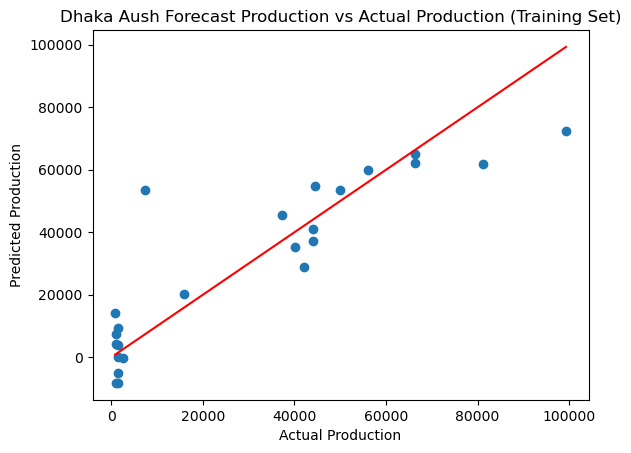

In [4]:
# Plot forecast production value and actual production value for the training set
plt.scatter(train_Y, train_y_pred)
plt.plot([min(train_Y), max(train_Y)], [min(train_Y), max(train_Y)], 'r')
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Dhaka Aush Forecast Production vs Actual Production (Training Set)')
plt.show()